# House predictions with linear regression

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
import pandas as pd
file_path = r'D:\Grokking_ML\Grokking_Machine_Learning\Linear_Regression\Hyderabad.csv'
data = pd.read_csv(file_path)
data.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [7]:
num_rows, num_cols = data.shape
print("The dataset has ", num_rows, "rows, and ", num_cols, " columns")

The dataset has  2518 rows, and  40  columns


Exploring the relationship between price and area

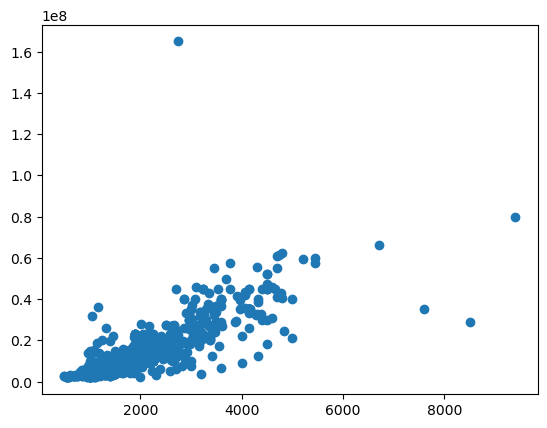

In [8]:
plt.scatter(data['Area'], data['Price'])

In [9]:
# Extract features (X) and target (y)
X = data[['Area']]  # Feature: Area
y = data['Price']  # Target: Price

# Create a Linear Regression model
simple_model = LinearRegression()

# Fit the model to the data
simple_model.fit(X, y)

LinearRegression()

In [10]:
# Print the coefficients
print(f"y-intercept: {simple_model.intercept_}")
print(f"slope (coefficient of Area): {simple_model.coef_[0]}")

y-intercept: -6222669.083283698
slope (coefficient of Area): 9753.940608184039


c:\Users\Harsh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


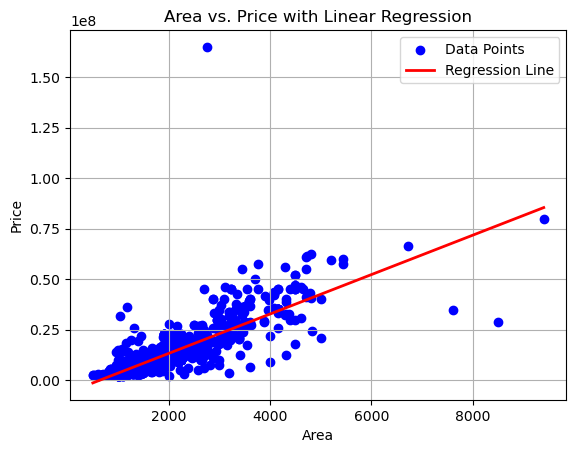

In [13]:
# Predict prices for a range of Area values to plot the regression line
area_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
predicted_prices = simple_model.predict(area_range)

# Plot the original data points
plt.scatter(X, y, color='blue', label='Data Points')

# Plot the regression line
plt.plot(area_range, predicted_prices, color='red', linewidth=2, label='Regression Line')

# Add labels and title
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs. Price with Linear Regression')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

Building a model that uses all the features

In [14]:
data

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,Nacharam,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,Manikonda,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,Madhapur,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,Hitech City,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


Pre-processing the data
In order to train a model in scikit-learn, we need to pre-process the data:

Remove missing values
Scale and center the numerical features
One-hot encode the categorical features

In [15]:
# First, we remove the bottom rows, which have missing data (encoded as '9')
data_truncated = data[:2434]
data_truncated

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429,4500000,1250,Kollur Road,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2430,3503000,1001,Miyapur,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2431,5600000,1551,chandrayangutta,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2432,7500000,3000,Jubilee Hills,3,1,1,0,0,1,0,...,0,1,1,0,0,0,0,0,0,0


In [16]:
# Scaling and centering the numerical features

data_scaled = data_truncated.copy()

# Calculate mean and standard deviation for 'Area'
area_mean = data_scaled['Area'].mean()
area_std = data_scaled['Area'].std()

# Scale and center 'Area'
data_scaled['Area'] = (data_scaled['Area'] - area_mean) / area_std

# Calculate mean and standard deviation for 'No. of Bedrooms'
bedrooms_mean = data_scaled['No. of Bedrooms'].mean()
bedrooms_std = data_scaled['No. of Bedrooms'].std()

# Scale and center 'No. of Bedrooms'
data_scaled['No. of Bedrooms'] = (data_scaled['No. of Bedrooms'] - bedrooms_mean) / bedrooms_std

# Print the head of the new dataframe to verify
print(data_scaled.head())

      Price      Area     Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0   6968000 -0.406547     Nizampet        -0.913997       0                 0   
1  29000000  2.477960  Hitech City         2.005515       0                 0   
2   6590000 -0.435953    Manikonda        -0.913997       0                 0   
3   5739000 -0.466696        Alwal         0.545759       1                 0   
4   5679000 -0.667195   Kukatpally        -0.913997       0                 0   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  ...  \
0          1             1                  1             1  ...   
1          1             1                  1             1  ...   
2          1             0                  0             0  ...   
3          0             0                  0             0  ...   
4          0             0                  1             0  ...   

   LiftAvailable  BED  VaastuCompliant  Microwave  GolfCourse  TV  \
0              1    0              

In [17]:
# One-hot encoding the Location feature

data_scaled_encoded = pd.get_dummies(data_scaled, columns=['Location'], prefix='Location', dtype=int)

In [18]:
# Print the head of the new dataframe
print(data_scaled_encoded.head())

      Price      Area  No. of Bedrooms  Resale  MaintenanceStaff  Gymnasium  \
0   6968000 -0.406547        -0.913997       0                 0          1   
1  29000000  2.477960         2.005515       0                 0          1   
2   6590000 -0.435953        -0.913997       0                 0          1   
3   5739000 -0.466696         0.545759       1                 0          0   
4   5679000 -0.667195        -0.913997       0                 0          0   

   SwimmingPool  LandscapedGardens  JoggingTrack  RainWaterHarvesting  ...  \
0             1                  1             1                    1  ...   
1             1                  1             1                    1  ...   
2             0                  0             0                    0  ...   
3             0                  0             0                    0  ...   
4             0                  1             0                    0  ...   

   Location_Zamistanpur  Location_chandrayangutta  \
0  

Fit a Linear Regression model

In [19]:
# Separate features (X) and target (y) from the scaled and encoded data
# 'Price' is the target variable
X_full = data_scaled_encoded.drop('Price', axis=1)
y_full = data_scaled_encoded['Price']

# Create a Linear Regression model
model_predict_all = LinearRegression()

# Fit the model to the data
model_predict_all.fit(X_full, y_full)

LinearRegression()

In [20]:
# Print the coefficients of the model

print("\nLinear Regression Model Coefficients (Predicting Price from all features):")
print(f"Intercept: {model_predict_all.intercept_}")
print("Coefficients for features:")
for feature, coef in zip(X_full.columns, model_predict_all.coef_):
    print(f"{feature}: {coef}")


Linear Regression Model Coefficients (Predicting Price from all features):
Intercept: 5.348590426051412e+17
Coefficients for features:
Area: 7023465.994432118
No. of Bedrooms: -946599.4577281869
Resale: 1243853.7694427632
MaintenanceStaff: -1009836.8713379139
Gymnasium: -567344.0578912832
SwimmingPool: -76460.49141061772
LandscapedGardens: 887823.4799070582
JoggingTrack: -616383.5285638422
RainWaterHarvesting: -501167.45128764526
IndoorGames: 383759.27598201716
ShoppingMall: 653066.1795252122
Intercom: -130184.56083657558
SportsFacility: -13270.403755185253
ATM: -267968.80973518384
ClubHouse: 380378.91307624313
School: -2588835.4991840287
24X7Security: -144263.1956952524
PowerBackup: 164168.34799077187
CarParking: -226225.16339871858
StaffQuarter: 514495.7115347568
Cafeteria: 1169247.9383162921
MultipurposeRoom: 339689.2807986285
Hospital: 1856914.0625702175
WashingMachine: 710909.9255692996
Gasconnection: 770439.5958840101
AC: 562101.681540905
Wifi: 808998.2327966838
Children'splayar

In [21]:
# Use the model to make predictions
y_pred = model_predict_all.predict(X_full)

# Evaluate the model
mse = mean_squared_error(y_full, y_pred)
rmse = np.sqrt(mse)
print(f"\nRoot Mean Squared Error (RMSE) of the model: {rmse}")


Root Mean Squared Error (RMSE) of the model: 3981398.9381679096


In [22]:
X_full.loc[0]

Area                         -0.406547
No. of Bedrooms              -0.913997
Resale                        0.000000
MaintenanceStaff              0.000000
Gymnasium                     1.000000
                                ...   
Location_muthangi             0.000000
Location_new nallakunta       0.000000
Location_nizampet road        0.000000
Location_raidurgam            0.000000
Location_west venkatapuram    0.000000
Name: 0, Length: 277, dtype: float64

In [23]:
# prompt: use the model_predict_all to predict the price of a house with size 1000 and 3 bedrooms

import pandas as pd
# To predict for a new house, we need to create a DataFrame with the same columns as X_full
# and apply the same scaling and encoding steps.

# New house data
new_house_data = pd.DataFrame({'Area': [1000], 'No. of Bedrooms': [3]})

# We need to apply the same scaling used for the training data
new_house_data['Area'] = (new_house_data['Area'] - area_mean) / area_std
new_house_data['No. of Bedrooms'] = (new_house_data['No. of Bedrooms'] - bedrooms_mean) / bedrooms_std

# For location, we assume a default location or one that was present in the training data.
# If we don't specify a location that was in the training data, the one-hot encoding
# will not create a column for that location, which will cause an error when predicting.
# Let's assume the new house is in 'Gachibowli', which was likely in the training data.
# If the location is unknown or not in the training data, we would need to handle this,
# e.g., by adding a column of zeros for that location or using a different approach.

# Create a dummy DataFrame with all possible location columns initialized to 0
# based on the columns of X_full that start with 'Location_'
location_cols = [col for col in X_full.columns if col.startswith('Location_')]
new_house_location_dummies = pd.DataFrame(0, index=new_house_data.index, columns=location_cols)

# Assuming the new house is in 'Gachibowli', set the corresponding column to 1
# Check if 'Location_Gachibowli' exists in the trained model's features
if 'Location_Gachibowli' in location_cols:
    new_house_location_dummies['Location_Gachibowli'] = 1
else:
    print("Warning: 'Location_Gachibowli' was not found in the training data locations.")
    # Handle cases where the location is not in the training data if necessary
    # For this example, we'll proceed without setting a specific location if it's not found.

# Combine the scaled features with the location dummy variables
# Ensure all columns from X_full are present, adding missing ones with value 0
new_house_processed = pd.concat([new_house_data, new_house_location_dummies], axis=1)

# Ensure the order and presence of columns match X_full exactly
# This is crucial for the prediction to work correctly
for col in X_full.columns:
    if col not in new_house_processed.columns:
        new_house_processed[col] = 0 # Add missing columns with value 0

# Reorder columns to match X_full
new_house_processed = new_house_processed[X_full.columns]


# Predict the price using the trained model
predicted_price = model_predict_all.predict(new_house_processed)

print(f"\nPredicted price for a house with size 1000 and 3 bedrooms: {predicted_price[0]:,.2f}")


Predicted price for a house with size 1000 and 3 bedrooms: 6,004,672.00
